In [19]:
from pyspark import SparkContext
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

In [4]:
center = [[1,1],[-1,-1],[1,-1]]

In [5]:
cluster_std = 0.3

In [11]:
X,label = make_blobs(n_samples=200,centers=center,n_features=2\
                    ,cluster_std=cluster_std , random_state=0)

In [13]:
print(X.shape)
print(label)

(200, 2)
[0 2 0 1 1 0 0 2 2 0 2 2 2 0 2 2 0 2 1 2 2 0 0 1 2 0 1 1 0 0 1 1 1 0 1 2 1
 2 2 0 0 0 0 1 2 1 2 1 0 1 1 0 2 0 1 1 2 2 0 1 2 2 1 0 2 0 0 1 0 2 2 1 1 2
 2 0 2 1 0 0 2 0 1 2 2 2 0 1 0 0 2 1 1 1 0 2 0 1 0 1 0 0 1 0 2 1 2 2 0 2 1
 2 2 2 1 2 0 0 2 1 2 0 1 2 1 1 1 0 1 0 1 0 1 2 2 0 1 1 0 2 1 0 1 2 2 2 0 1
 1 1 0 0 2 2 0 0 1 2 1 1 0 1 0 1 2 2 0 2 0 1 0 1 2 1 0 2 1 0 0 2 2 1 1 1 1
 2 1 2 1 0 0 0 0 1 2 2 0 1 0 2]


In [14]:
unique_labels=set(label)

In [24]:
unique_labels

{0, 1, 2}

In [20]:
colors=plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

In [29]:
for i,j in zip(unique_labels,colors):
    print(type(j))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


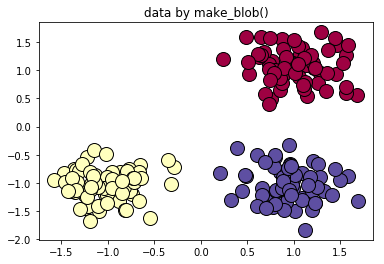

In [68]:
for k,col in zip(unique_labels,colors):
    x_k = X[label==k]
    plt.plot(x_k[:,0],x_k[:,1],'o',markerfacecolor=col,markeredgecolor='k',\
            markersize=14)
plt.title('data by make_blob()')
plt.show()

In [121]:
def closestPoint(p,centers):
    bestIndex = 0 
    closest = float("+inf")
    for i in range(len(centers)):
        tempDist =np.sum((p-centers[i])**2)
        if tempDist < closest:
            closest = tempDist
            bestIndex = i
    return bestIndex

In [70]:
sc.stop()
sc = SparkContext()

In [122]:
inputData = sc.parallelize(X).cache()
K=3
convergeDist = 0.001
tempDist = 1
kPoints = inputData.takeSample(False,K,1)
print(kPoints)

[array([-0.35102922, -0.59904162]), array([0.73366428, 0.40576106]), array([1.45983376, 1.44080763])]


In [126]:
while tempDist > convergeDist:
    closest = inputData.map(lambda p: (closestPoint(p, kPoints), (p, 1)))
    pointStats = closest.reduceByKey(lambda p1_c1, p2_c2: (p1_c1[0] + p2_c2[0], p1_c1[1] + p2_c2[1]))
    newPoints = pointStats.map(lambda st: (st[0], st[1][0] / st[1][1])).collect()
    tempDist = sum(np.sum((kPoints[iK] - p) ** 2) for (iK, p) in newPoints)
    for (iK, p) in newPoints:
        kPoints[iK] = p

In [127]:
print('Final centers:'+str(kPoints))

Final centers:[array([-1.03507066, -1.03233287]), array([ 0.95712283, -1.02057236]), array([1.01281413, 1.06595402])]


In [128]:
newInput = closest.collect()

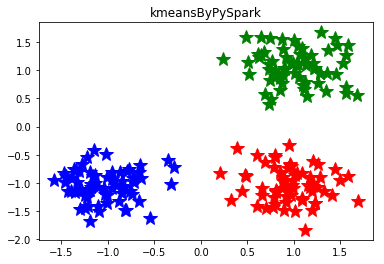

In [130]:
for p in newInput:
    if p[0]==0:
        plt.plot(p[1][0][0], p[1][0][1], '*', markerfacecolor='b', markeredgecolor='b',
                 markersize=14)
    elif p[0]==1:
        plt.plot(p[1][0][0], p[1][0][1], '*', markerfacecolor='r', markeredgecolor='r',
                 markersize=14)
    else:
        plt.plot(p[1][0][0], p[1][0][1], '*', markerfacecolor='g', markeredgecolor='g',
                 markersize=14)
plt.title('kmeansByPySpark')
plt.show()